# Python Notebooks

## Goals
The goal of this notebook is to briefly introduce you to the main tools we will use in this practical seminar: Python code and markdown Notebooks.  The focus will be on using markdown to create interactive notebooks, which you can share with others.

## Getting started

**Notebooks** represent an interactive environment for writing and executing code, while at the same time also documenting the code with rich text. Here we review some elementary ways of creating your notebooks.

We will be using **Google Colab**, which is a free notebook environment, that does not require any installations and uses Google servers to execute the code. You can simply run it in your browser, after you create a free Google account (if not yet done).

To open a new notebook in Google Colab click [here](https://colab.research.google.com/) and then click on the "New Notebook" at the bottom right.

You can open this notebook in Colab by clicking on the Open in Colab badge on top of the file.

A notebook consists of two kinds of cells:
* cellls that contain executable **code** and
* cells that contain **markdown (text)**.

Here we'll provide a more detailed introduction to the text cells, while the following seminars we'll focus more on the code cells.

Markdown syntax is very similar to HTML, but it is more simplified. Here are some additional introductory ressources:
- Try markdown on your own in [Google Colab](https://colab.research.google.com/notebooks/markdown_guide.ipynb)
- You can also find a more detailed and [lengthy introduction](https://about.gitlab.com/handbook/product/technical-writing/markdown-guide/).

### Switching between Code and Text/Markdown

- If you want to include markdown in a code cell, you can convert it to a text cell by pressing `control M M` (that is hold down the `control` key and press two times the letter `M`).
- You can convert a text cell into a code cell using the shortcut `control M Y`.

<div class="alert alert-block alert-info">


<h2>Shortcuts</h2>

It's good to learn the following shortcuts:


- Execute a cell: shift-enter on Mac (ctrl-enter for Windows)
- Saving the notebook: command s on a Mac, (ctrl-s for Windows)
- Change Cell types: ctrl M Y (code), ctrl M M (markdown)

<h2>Saving & downloading your notebook</h2>

You can save your notebook in your Google Drive using the Colab Menu > File > Save a copy in Drive (Google Drive), or directly in GitHub.

You can also download the notebook using File>Download>  .ipynb (notebook format).

</div>




# Basic operations with Pandas

<img width="200" src='https://upload.wikimedia.org/wikipedia/commons/e/ed/Pandas_logo.svg'>

##Data cleaning
### How Does Data Get Dirty?
- Missing data.
- Inconsistent data.
- Duplicate data.

This is just to name a few things that can go wrong. There is an endless list of ways that data can end up very messy.
Sometimes there are insufficient validation checks when the data is entered in the first place.
If you have form fields with users entering data in any format they want with no guidelines or form validation checks in place to enforce conforming to a certain format, then users will input however they see fit.

There could be an input field for the state (U.S.) and you have some data that is the two-character abbreviation, NY and then others have New York, then there are potential misspellings and typos, etc.

Data can also become corrupted during transmission or in storage.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("userRecords.csv")


###Shape of the data

Let's first check how many rows and columns (features) are in this dataset

In [ ]:
df.shape

(953, 9)


### Check out the first few rows
You can look at the first few rows by calling `head()` on the dataframe.

In [ ]:
df.head(3)

,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,0,317991,Lucas,Alvarez,29-07-2003,AR,1.0,2.0,Web Designer
1,1,241892,Matias,Rodriguez,10-11-1999,AR,1.0,0.0,Banker
2,2,303376,Franco,Acosta,25-07-1984,AR,1.0,0.0,Kitchen staff


### List the column/feature names

In [ ]:
df.columns

Index(['Unnamed: 0', 'UserID', 'first_name', 'last_name', 'birthday',
       'country', 'marital_status', 'number_of_kids', 'employment'],
      dtype='object')

### Duplicates
You can check if there are duplicates in the dataset.

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Length: 953, dtype: bool

This shows which are the duplicated rows if any. None are duplicated here.

In [ ]:
df.loc[df.duplicated()=='True', :]

,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment


You can check if the same value appears in a single column more than once in the dataset. Are there multiple users with the same birthday?

In [ ]:
df.birthday.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
948    False
949    False
950    False
951    False
952    False
Name: birthday, Length: 953, dtype: bool

You can also filter the table so that only entries with given characteristics are maintained, for example users from Switzerland (CH)

In [ ]:
df[df['country']=='CH'].head()

,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
155,155,273453,Luca,Keller,15-07-1998,CH,0.0,1.0,Professor
156,156,112768,Dominique,Meier,28-05-1995,CH,1.0,0.0,Banker
157,157,785535,Marc,Steiner,05-01-1995,CH,0.0,NaN,Manager
158,158,446376,Nadine,Meyer,29-12-1963,CH,1.0,1.0,Web Designer
159,159,205381,Marc,Pereira,28-01-1975,CH,1.0,0.0,Kitchen staff


You can also get the list of people who have their birthday the same day as another person in the dataset

In [ ]:
df[df.birthday.duplicated()].head()

,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
73,73,470030,Kazi,Haque,24-07-1967,BD,NaN,4.0,Manager
181,181,133154,Rosa,Fuentes,22-09-1968,CL,1.0,0.0,Banker
207,207,233165,Maribel,Hernandez,08-01-1955,CR,NaN,2.0,Teaching Assistant
286,286,621691,نور,Karim,24-12-1957,DZ,1.0,2.0,Librarian
326,326,569511,Sonia,Gomez,30-11-2004,ES,NaN,3.0,Banker


You can also show all users who have their birthday on the same day by checking who has their birthday on one of the duplicated dates.

In [ ]:
duplicate_dates = df[df.birthday.duplicated()]['birthday'].to_list()

df[df['birthday'].isin(duplicate_dates)].sort_values('birthday').head()

,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
45,45,848523,Gunel,Bayramov,02-12-1991,AZ,NaN,4.0,Teaching Assistant
393,393,719655,Elizabeth,Lopez,02-12-1991,GT,1.0,0.0,Teaching Assistant
498,498,231770,Pooja,Yadav,06-04-1970,IN,0.0,2.0,Manager
768,768,166980,Paweł,Adamczyk,06-04-1970,PL,0.0,1.0,Web Designer
718,718,856596,Martijn,De Jong,07-07-1962,NL,NaN,1.0,Manager


### Missing/Null values
You can call `isnull()` and `sum()` to get a count of how many null values are there in each column.

In [ ]:
df.isnull().sum()

Unnamed: 0          0
UserID              0
first_name          0
last_name           0
birthday            0
country             0
marital_status    102
number_of_kids    152
employment          0
dtype: int64

### Data Types of the Features
It is important that the data values in each column have the correct data type. For example, you can expect a column containing numbers to be in numeric format, but sometimes you will find string values in it. In such a case, when you do numeric calculations on that column you might get unexpected results.

The property `dtypes` will show you the data types for each column in the dataframe.

In [ ]:
df.dtypes

Unnamed: 0          int64
UserID              int64
first_name         object
last_name          object
birthday           object
country            object
marital_status    float64
number_of_kids    float64
employment         object
dtype: object

You can notice that the column `issue_date` is in integer format (`int64`), whereas it should be in datetime format. In Pandas you can convert a column to datetime format using `to_datetime` method.

In [ ]:
df['birthday'].head()

0    29-07-2003
1    10-11-1999
2    25-07-1984
3    20-03-1970
4    05-10-1971
Name: birthday, dtype: object

In [ ]:
# if you do not provide the format, the function may infer the wrong format
pd.to_datetime(df['birthday']).head()

<ipython-input-14-b74be5aa1e73>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  pd.to_datetime(df['birthday']).head()


0   2003-07-29
1   1999-10-11
2   1984-07-25
3   1970-03-20
4   1971-05-10
Name: birthday, dtype: datetime64[ns]

In [ ]:
df['birthday'] = pd.to_datetime(df['birthday'], format="%d-%m-%Y")
df['birthday'].head()

0   2003-07-29
1   1999-11-10
2   1984-07-25
3   1970-03-20
4   1971-10-05
Name: birthday, dtype: datetime64[ns]

### Dropping the columns you are not interested in
Let's say we are only interested in users last names, their first name and their origin. So we are going to drop the rest of the columns.

Note that many operations in Pandas can be done on a copy of the data or in-place (affecting the original data frame). You can use the parameter `inplace=True`.

> Also note that in Pandas, axis 0 represents the rows while axis 1 represents the columns.

In [ ]:
df.dropna().head()

,Unnamed: 0,UserID,first_name,last_name,birthday,country,marital_status,number_of_kids,employment
0,0,317991,Lucas,Alvarez,2003-07-29,AR,1.0,2.0,Web Designer
1,1,241892,Matias,Rodriguez,1999-11-10,AR,1.0,0.0,Banker
2,2,303376,Franco,Acosta,1984-07-25,AR,1.0,0.0,Kitchen staff
3,3,761992,Franco,Gomez,1970-03-20,AR,1.0,0.0,Teaching Assistant
4,4,373318,Jorge,Rojas,1971-10-05,AR,1.0,0.0,Administrative employee


In [ ]:
columns_to_delete = ['UserID', 'birthday']
df.drop(columns_to_delete, inplace=True, axis=1)
df.head()

,Unnamed: 0,first_name,last_name,country,marital_status,number_of_kids,employment
0,0,Lucas,Alvarez,AR,1.0,2.0,Web Designer
1,1,Matias,Rodriguez,AR,1.0,0.0,Banker
2,2,Franco,Acosta,AR,1.0,0.0,Kitchen staff
3,3,Franco,Gomez,AR,1.0,0.0,Teaching Assistant
4,4,Jorge,Rojas,AR,1.0,0.0,Administrative employee


You can also select the columns to keep instead of selecting the columns to delete

In [ ]:
columns_to_keep = ['first_name', 'last_name', 'country']
df = df[columns_to_keep]
df.head()

,first_name,last_name,country
0,Lucas,Alvarez,AR
1,Matias,Rodriguez,AR
2,Franco,Acosta,AR
3,Franco,Gomez,AR
4,Jorge,Rojas,AR


With the help of the value_counts() function you can see how many people in the dataset are from each country.
You can also use it to find how many maried people we have per country.

In [ ]:
df = pd.read_csv("userRecords.csv")
df["country"].value_counts().sort_values(ascending = False).head()

US    30
EE    30
CR    30
LU    30
MD    29
Name: country, dtype: int64

In [ ]:
df[df['marital_status'] == 1]['country'].value_counts().head()

LU    17
MD    15
IN    15
CR    14
EE    14
Name: country, dtype: int64

You can also use the group by method to aggregate data depending on one category.

We can use it to find the the average number of kids per country

In [ ]:
df = pd.read_csv('userRecords.csv')
df= df[['country', 'number_of_kids']]
df = df.dropna()

df = df.groupby('country').mean().sort_values('number_of_kids', ascending=False)
df.head()

,number_of_kids
country,
HR,1.933333
PH,1.928571
DK,1.900000
DZ,1.692308
PR,1.666667


##Your turn !


Now a small exercice so that you can practice what we have learned so far.
Based on this [new dataset](https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Week_2/movie_data.csv), answer these questions:


*   What is the shape of the dataset?
*   What are the names of the columns ?
*   Are there any duplicates ? If yes, which ones ?
*   Are there any missing values ? If yes, which ones ?
*   How many movies have a rating of 5 ? Create a list with the name of the movies



#Operations with multiple datasets using pandas

Sometimes data sets may come from different sources. In those cases you may need to merge datasets together.

Let's assume two datasets, user data and flight records.

The two data sets can be linked through the "user_id" column.

In [ ]:
#check the dataset with user data
user_data = pd.read_csv('userRecords.csv')
user_data = user_data[['UserID', 'first_name', 'last_name']]
user_data.head(2)

,UserID,first_name,last_name
0,317991,Lucas,Alvarez
1,241892,Matias,Rodriguez


In [ ]:
#check the dataset with the flight records
flight_records = pd.read_csv('flightRecords.csv')
flight_records.head(2)

,Unnamed: 0,flightName,departure,destination,date,userID
0,0,KX65826,AR,IT,20-01-2010,317991
1,1,CL12336,IT,MT,16-06-2010,317991


[Merging](https://pandas.pydata.org/docs/user_guide/merging.html) the two datasets:

In [ ]:
combined_dataset = pd.merge(flight_records, user_data, left_on="userID", right_on='UserID', how="left", sort=False)
combined_dataset = combined_dataset.sort_values('date')

combined_dataset.head(2)

,Unnamed: 0,flightName,departure,destination,date,userID,UserID,first_name,last_name
11346,11346,YJ27333,IT,CR,01-01-2011,791891,791891,Goran,Kovačević
3089,3089,FI48462,DE,GT,01-01-2011,601265,601265,Eliane,Lopes


Now we can find who traveled on a given date, for example on the 1st of december 2022

In [ ]:
combined_dataset[combined_dataset['date']=='01-12-2022']

,Unnamed: 0,flightName,departure,destination,date,userID,UserID,first_name,last_name
13376,13376,CV268103,IE,FR,01-12-2022,544592,544592,Rajesh,Mishra
21425,21425,KP621310,IS,CZ,01-12-2022,662472,662472,Nuno,Ribeiro
3793,3793,PJ89418,FI,CA,01-12-2022,443524,443524,Mike,Wang
18610,18610,OP17944,PT,GB,01-12-2022,622305,622305,Nurul,Chong
15655,15655,XV72965,LT,AT,01-12-2022,119460,119460,Mindaugas,Baranauskas


We can also find the travels of all people who's first name is "Nicolas"

In [ ]:
combined_dataset[combined_dataset['first_name']=='Nicolas'].head(3)

,Unnamed: 0,flightName,departure,destination,date,userID,UserID,first_name,last_name
2229,2229,JV82278,AZ,BD,01-01-2017,728073,728073,Nicolas,Aerts
2225,2225,PQ55354,CL,AZ,01-04-2015,728073,728073,Nicolas,Aerts
2236,2236,TW62934,RU,ZA,01-12-2020,728073,728073,Nicolas,Aerts


## Your turn !

With the [netflix dataset](https://raw.githubusercontent.com/michalis0/DataScience_and_MachineLearning/master/Week_2/netflix_data.csv), merge the two dataset on the movie's title and give the movie that has the best Netflic Score and a IMDB score over 4.5.

#[Data visualisation ](https://pandas.pydata.org/docs/user_guide/visualization.html)

Data can be hard to comprehend on it's own,
Sometimes visualization tools can be helpfull to get a better sense of it.

Let's first make a pie chart to visualise the sum of the children born in the top 5 most fertile countries

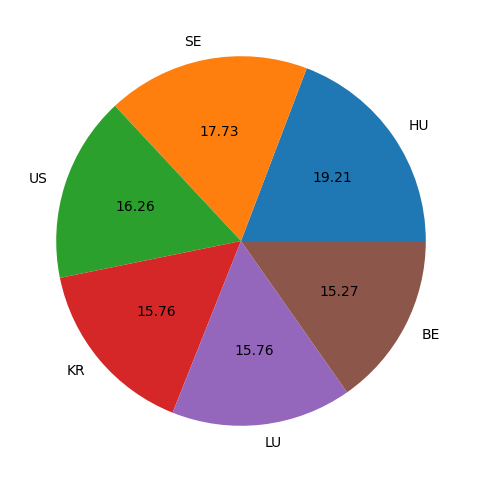

In [ ]:
df = pd.read_csv('userRecords.csv')
df= df[['country', 'number_of_kids']]
df = df.dropna()
df = df.groupby('country').sum().sort_values('number_of_kids', ascending=False)
df = df[0:6]
series = pd.Series(df['number_of_kids'].to_list(), index=df.index.to_list())


series.plot.pie(autopct="%.2f",figsize=(6, 6));

##Boxplots are also usefull to compare data

For the following exercise we will compare mobile data consumption per country

Lets first combined the phone logs dataset with the antenna info dataset in order to link each antena to a country

In [ ]:
phone_logs = pd.read_csv("all_phone_logs.csv")
phone_logs.head()

,user_id,dandwith_used,antena_id,date_and_time,duration
0,638192,92,4287776,2015-01-01 00:00:00,0:36:47
1,333546,441,3664967,2015-01-01 00:40:34,0:18:38
2,649811,351,3017369,2015-01-01 01:37:13,0:46:52
3,412762,327,5273090,2015-01-01 02:05:15,0:05:33
4,459020,356,3197614,2015-01-01 02:13:23,0:31:46


In [ ]:
antenna_info = pd.read_csv("antena_info.csv")
antenna_info.head()

,Unnamed: 0,antena_id,antena_provider,antena_zip_code,antena_range,antena_capacity,country
0,0,4206052,LYBRA,3151,153,165226,AR
1,1,4864309,Sunrise,8146,198,169111,AR
2,2,6936974,LYBRA,6439,66,29794,AR
3,3,4195935,LYBRA,3592,158,87953,AR
4,4,1575985,SALT,3045,94,84865,AR


In [ ]:
combined_dataset = pd.merge(phone_logs, antenna_info, left_on="antena_id", right_on='antena_id', how="left", sort=False)
combined_dataset = combined_dataset.sort_values('country')

combined_dataset.head(2)

,user_id,dandwith_used,antena_id,date_and_time,duration,Unnamed: 0,antena_provider,antena_zip_code,antena_range,antena_capacity,country
91151,302708,83,4864309,2020-04-10 06:30:44,0:53:37,1,Sunrise,8146,198,169111,AR
126895,118722,262,3623343,2022-05-07 15:46:41,0:23:43,6,SWISSCOM,4296,106,113385,AR


In [ ]:
consumption_per_country = combined_dataset[['dandwith_used', 'country']]
consumption_per_country = consumption_per_country.groupby('country').sum()
consumption_per_country.head(5)

,dandwith_used
country,
AR,724829
AT,720953
AZ,680768
BD,726872
BE,735851


<Axes: >

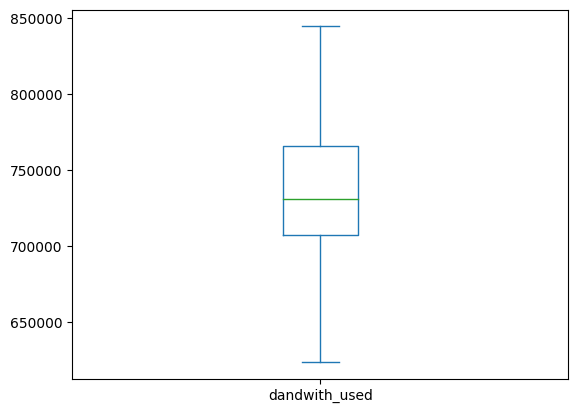

In [ ]:
consumption_per_country.plot.box()

Let's now find the consumption per country per year, and then display it in boxplots

<Axes: title={'center': 'dandwith_used'}, xlabel='[year]'>

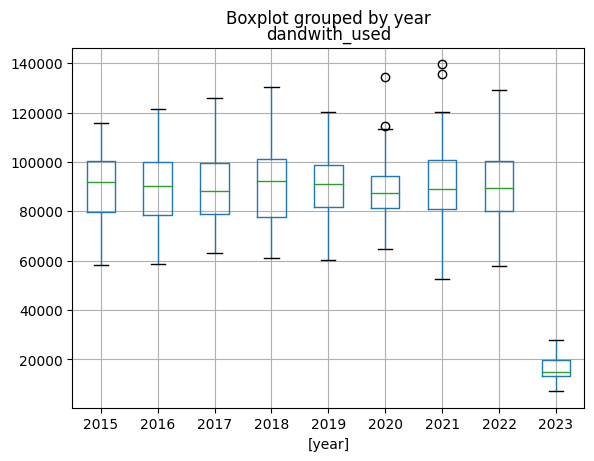

In [ ]:
combined_dataset['date_and_time'] = pd.to_datetime(combined_dataset['date_and_time']).to_list()
combined_dataset['year'] = list(map(lambda x: x.year,combined_dataset['date_and_time'].to_list()))


consumption_per_country_per_year = combined_dataset[['dandwith_used', 'country', 'year']]
consumption_per_country_per_year = consumption_per_country_per_year.groupby(['country', 'year']).sum()
consumption_per_country_per_year.boxplot(by = 'year')